## Define Soil texture class based on Sand, Silt and Clay

In [42]:
import pandas as pd
import numpy as np

USDA Soil Texture Boundaries

https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_031477.pdf

https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/stelprdb1044818.pdf

In [43]:
silt = 15
clay = 5
if silt+(1.5*clay)>15 and silt+2*clay<30:
    soil_type='Loamy Sand'
    print(soil_type)

Loamy Sand


In [44]:
def soil_texture_classifier(sand, clay):
    
    """
    Input parameters: typle or list of Sand, Silt, Clay - %
    
    Output - soil type
    
    """
    
    silt = 100 - sand - clay
#     sand,silt,clay = list(soil_properties)
    assert (type(sand)==float)or(type(sand)==int), 'Houston, we have problems: Sand, Silt, Clay should be float or int (54,4% or 44%)'
#     assert np.round(silt+clay+sand, decimals=1) == 100, 'Houston, we have problems: Sand, Silt, Clay should be bigger 0 and less 100'
    soil_type='random soil'
    if silt+(1.5*clay)<15:
        soil_type='Sand'
    elif silt+(1.5*clay)>=15 and silt+2*clay<30:
        soil_type='Loamy Sand'
    elif (20>clay>=7 and sand>52 and silt+2*clay>=30) or \
         (clay<7 and silt<50 and silt + 2*clay > 30):
        soil_type='Sandy Loam'
    elif 7<=clay<27 and 28<=silt<50 and sand<=52:
        soil_type = 'Loam'
    elif (50<=silt and 12<=clay<27) or (50<=silt<80 and clay<12):
        soil_type = 'Silt Loam'
    elif 80<=silt and clay<12:
        soil_type = 'Silt'
    elif 20<=clay<=35 and silt<28 and sand>45:
        soil_type = 'Sandy Clay Loam'
    elif 27<=clay<40 and 20<sand<=45:
        soil_type = 'Clay Loam'
    elif 27<=clay<40 and sand<=20:
        soil_type = 'Silty Clay Loam'
    elif 35<=clay and 45<sand:
        soil_type = 'Sandy Clay'
    elif 40<=clay and 40<=silt:
        soil_type = 'Silty Clay'
    elif 40<=clay and sand<=45 and silt<40:
        soil_type = 'Clay'
    else:
        soil_type = 'Sandy Loam'
    return soil_type

In [47]:
df_xls[['Sand, (%)', 'Clay, (%)']]

,"Sand, (%)","Clay, (%)"
0,36.8,33.3
1,34.9,36.2
2,36.4,34.7
3,33.4,39.2
4,32.5,40.4
...,...,...
67,36.9,35.2
68,36.5,35.5
69,34.6,39.1
70,34.2,38.8


In [59]:
float(df_xls.iloc[0,:]["Sand, (%)"])

36.800000000000004

In [62]:
df_xls = pd.read_excel('./soil.xls', index_col=0)

df_xls['Soil type'] = df_xls.apply(lambda x: \
                                   soil_texture_classifier(float(x["Sand, (%)"]),\
                                                           float(x["Clay, (%)"])),\
                                                            axis=1)


In [63]:
df_xls

,Latitude,Longitude,Layer_top_cm,Layer_bottom_cm,Organic Carbon (%),pH*10,Bulk Density (g/cm3),"Clay, (%)","Silt, (%)","Coarse, (%)","Sand, (%)",Ks (cm/h),Field Capacity,Wilting point,Wmax,Wmin,Soil type
0,12.023198,79.503140,0,5,3.14,72,1.38,33.3,29.9,7.0,36.8,0.575987,0.327141,0.171079,0.437026,0.008452,Clay Loam
1,12.023198,79.503140,5,15,2.11,72,1.38,36.2,28.9,7.2,34.9,0.562288,0.334343,0.178826,0.443155,0.008624,Clay Loam
2,12.023198,79.503140,15,30,1.66,72,1.40,34.7,28.9,8.0,36.4,0.522391,0.327175,0.174576,0.434916,0.008680,Clay Loam
3,12.023198,79.503140,30,60,0.90,73,1.43,39.2,27.4,10.4,33.4,0.437650,0.333517,0.186047,0.436113,0.009000,Clay Loam
4,12.023198,79.503140,60,100,0.50,73,1.44,40.4,27.1,10.0,32.5,0.413267,0.334854,0.189015,0.435762,0.009070,Clay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,12.294017,79.701304,5,15,2.06,68,1.35,35.2,27.9,8.4,36.9,0.677222,0.335528,0.176782,0.449484,0.008784,Clay Loam
68,12.294017,79.701304,15,30,1.16,68,1.37,35.5,28.0,8.4,36.5,0.610444,0.333299,0.177187,0.444757,0.008800,Clay Loam
69,12.294017,79.701304,30,60,0.74,70,1.43,39.1,26.3,10.2,34.6,0.451542,0.332568,0.185844,0.436335,0.009231,Clay Loam
70,12.294017,79.701304,60,100,0.40,71,1.44,38.8,27.0,11.1,34.2,0.423081,0.330766,0.184986,0.432817,0.009100,Clay Loam


## Plots

In [4]:
import os

In [5]:
path = '../soilgrids/points_India/final_points/'
df_test = pd.DataFrame()
for file in os.listdir(path):
    try:
        
        df = pd.read_excel(os.path.join(path, file, f'{file}_soil_data.xlsx'), engine='openpyxl')
        df['Sand, (%)'] = 100 - (df['Silt, (%)'] + df['Clay, (%)'])
        soil_type = soil_texture_classifier(df[['Sand, (%)', 'Silt, (%)', 'Clay, (%)']].mean())
        print(file, soil_type)
        clay = int(df['Clay, (%)'].mean())
        silt = int(df['Silt, (%)'].mean())
        sand = 100 - clay - silt
        row = [sand, silt, clay, 30, \
               df['Organic Carbon (%)'].mean(),df['District'].values[0]]
        
        df_test= df_test.append(pd.Series(row), ignore_index=True)
    except:
        continue


Kaithal Clay Loam
Bargarh Clay Loam
Kaimur Clay Loam
Kalahandi Clay Loam
Dewas Clay
Rohtak Loam
Sonipat Clay Loam
Gaya Clay Loam
Baleswar Clay Loam
Purnea Clay Loam
Bhiwani Sandy Clay Loam
Rohtas Clay Loam
Yadgir Clay Loam
Ujjain Clay
Karnal Clay Loam
Davanagere Clay


In [9]:
df_test.columns = ["sand","silt","clay","porosity","om","site"]
df_test[["sand","silt","clay"]] = df_test[["sand","silt","clay"]].astype(int)
df_test.to_csv('test_csv_soil.csv')

In [7]:
from trianglegraph import SoilTrianglePlot
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
df_test

,sand,silt,clay,porosity,om,site
0,37,35,28,30.0,0.615000,Kaithal
1,25,37,38,30.0,0.804861,Bargarh
2,26,38,36,30.0,0.764242,Kaimur
3,36,32,32,30.0,0.881538,Kalahandi
4,20,38,42,30.0,0.587778,Dewas
5,41,35,24,30.0,0.717333,Rohtak
6,40,33,27,30.0,0.581458,Sonipat
7,23,42,35,30.0,0.829306,Gaya
8,26,35,39,30.0,1.553333,Baleswar
9,32,41,27,30.0,1.093690,Purnea


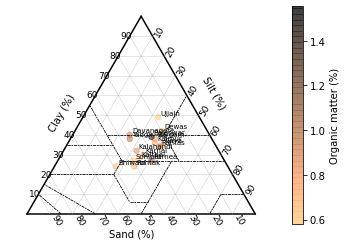

In [8]:
#One to load data from a .csv file
fstp = SoilTrianglePlot()
fstp.soil_categories()
fstp.scatter_from_csv('t', diameter='porosity', hue='om', tags='site', cmap=cm.copper_r, alpha=0.5)
fstp.colorbar('Organic matter (%)')
# fstp.show('triangleplot_subtle')

# plt.savefig('test.svg')